In [66]:
import sys
import os
import pprint as pp
import pandas as pd
import numpy as np
import math
from collections import defaultdict, Counter
import os
import glob
import xlrd

import itertools
import re
from dateutil import tz
from datetime import datetime

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import matplotlib as plt
import seaborn as plt

# Stats
import scipy.stats as stats
from numpy.random import binomial

%matplotlib inline

# Display settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_columns',350)
pd.set_option('max_info_columns', 350)
pd.options.mode.chained_assignment = None # Prevents error message from showing for copy/slices of dataframes

In [ ]:
# if assessment_protocol_errors.select_dtypes(include=[bool]).size:
#     assessment_protocol_errors[assessment_protocol_errors.select_dtypes(include=[bool]).columns] = assessment_protocol_errors.select_dtypes(include=[bool]).astype(int)

In [21]:
assessment_protocol_errors = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Assessment_Protocol_Errors-Table.csv')
print("Assessment Protocol Errors")
assessment_protocol_errors.sample(15)

assessment = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Assessment-Table.csv')
print("Assessment")
assessment.sample(15)

case_event = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Case_Event_Map-Table.csv')
print("Case Event Map")
case_event.sample(15)

chw = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/chw-Table.csv')
print("CHW Table")
chw.sample(15)

mm_raw_data = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Data_From_MUSO_MedicMobile_20180308.csv')
print("Raw from Muso")
mm_raw_data.sample(15)

patient_case = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Patient_Case-Table.csv')
print("Patient Case Table")
patient_case.sample(15)

patient = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Patient-Table.csv')
print("Patient")
patient.sample(15)

treatment_fu = pd.read_csv('/Users/veenakumar/Desktop/Medic Mobile/Treatment_Follow_Up-Table.csv')
print("Treatment Follow Up")
treatment_fu.sample(15)

Assessment Protocol Errors


,assessment_uuid,chw,chw_area,formname,has_protocol_errors,number_of_protocol_errors,act_based_combination_without_positive_tdr,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,diarrhea_without_5day_follow_up,diarrhea_without_ors,diarrhea_without_zinc,fever_without_tdr,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr,reported
50786,E20ECBC0-B7AD-1B34-AC7E-C2AE4EB11144,45004038-1df7-4741-a240-2c508430a161,75418909-51c4-4055-917b-e0f0bc356357,patient_assessment,True,4,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,2017-03-29 10:54:12.305
17661,AE78EBEE-C6B0-6838-8164-BEF135D63B89,a7f09f1a-28f2-4afa-85b8-9d8bf918bafa,a8ea9701-1873-4025-9c9f-f9d1a1fc48db,patient_assessment,True,4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,2017-07-19 07:45:49.669
37559,870D70F8-037B-9ED6-95A7-49320C1916C5,9607ea23-1f20-45bb-94d0-ab6e978fcc40,80d1433b-3d52-482b-8be3-985d7d4c1eb0,patient_assessment,True,4,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,2017-03-24 10:15:57.807
38073,53F4922B-A349-C9BA-A95F-1DB3CE6785CD,88472068-0824-4ec2-a473-a24c90cfb084,bcf9b283-6360-4146-883f-265e5d4572d9,patient_assessment,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2017-11-20 10:26:25.632
13131,71699C08-C201-BF6D-9EA5-AF7AF008E372,d19a7b21-58fd-4236-ac27-f4b2798c10f1,e97a33f5-a05f-4db8-b4d8-56c0be51b511,patient_assessment,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,2018-02-17 13:50:42.578
18652,683CC850-10BB-A41C-AF76-06B672247F83,fda753c1c37ef32fba0138a4c7c38f82,0c4fe92e-15b8-443c-aac0-e99e7212426e,patient_assessment,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-08-09 14:49:42.829
21994,5B309E19-D7D9-23EB-9D07-3CCA78014CCC,db91e797f2ce030419456e90ab79eba0,af471ca0-ad47-41d0-bd47-4f60bed45d33,patient_assessment,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-11-30 07:47:09.415
40742,F878B6D1-D431-FD04-B078-95C2EB3641A9,1ccfdc1a-8ab9-49c2-82cc-88647811f6f4,d07ed6a4-c9d3-4d14-96a6-770d25b7a5c4,patient_assessment,True,5,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2017-12-08 11:36:56.503
22331,513ED55E-ABA2-8945-A009-67F8FDEB5AA6,2f4520b0-071c-49a4-a459-a8260086ae12,8a955262-f4bd-43c6-88bd-f81e51daf213,patient_assessment,True,3,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-04-12 08:14:35.702
42043,F6312A7D-4862-4B69-B192-D00A6EBD2668,a1376d9f-65f7-4b39-a0dc-781a18583fcb,8f41a6cb-d91b-4be8-affa-91712714011e,patient_assessment,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2017-07-28 07:40:41.523


Assessment


,case_id,chw_id,chw_parent_id,patient_id,reported,how_child_found,when_assessed,when_illness_began,acc_danger_sign_seizure,acc_danger_sign_loss_of_consiousness,acc_danger_sign_unable_to_drink_or_breastfeed,acc_danger_sign_disorientation_or_confusion,acc_danger_sign_vomits_everything,acc_danger_sign_chest_indrawing,acc_danger_sign_wheezing,acc_danger_sign_bleeding_that_does_not_stop,acc_danger_sign_lathargy,ref_danger_sign_severe_jaundice,ref_danger_sign_dark_colored_urine,ref_danger_sign_child_is_sick,ref_danger_sign_conjunctival_pallor,ref_danger_sign_red_shakir_strip,ref_danger_sign_not_gaining_weight,ref_danger_sign_eodema_lower_legs,ref_danger_sign_diarrhea_more_than_14_days,ref_danger_sign_other_diseases_newborn,ref_danger_sign_cough_more_than_14_days,ref_danger_sign_blood_in_stools,temperature,temperature_retake,respiration_rate,notion_of_fever,vomiting,sluggish,chills,lose_of_appetite,cough,stools_exceed_3_per_day,tdr_done,tdr_result,acc_tdr_not_done,ref_tdr_not_done,malaria_tdr_not_done,accompany_to_cscom,refer_to_cscom,treat_malaria,malaria_give_act,malaria_act_dosage,malaria_not_give_act,treat_diarrhea,diarrhea_did_you_give_zinc,diarrhea_zinc_dosage,diarrhea_why_not_give_zinc,diarrhea_why_not_give_zinc_other,diarrhea_did_you_give_ors,diarrhea_why_not_give_ors,diarrhea_why_not_give_ors_other,treat_ari,ari_receive_honey,ari_receive_eucalyptus,ari_receive_lemon,ari_give_amox,ari_give_amox_dosage,ari_not_give_amox,ari_not_give_amox_other,nutri_color_shakir
45291,BCA0EBAA-DDE6-727E-A759-8C13BAE04E03,c8bddef4-d7d5-4896-9e9f-4caf59ed2dd1,d2a45b60-9def-4dcf-ba11-85a5fdb89ecb,759b3780-5540-4458-ba16-9a945a2532fe,2017-12-16 08:44:01+00,home_visit,c_assessment_time_1,c_when_illness_2,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,37.6,NaN,52.0,yes,no,no,yes,yes,yes,no,yes,positif,NaN,NaN,NaN,False,False,False,yes,2_tablets_act,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,yes,10_ml_amox,NaN,NaN,Green
45121,59289423-F269-E7A6-93C8-48B3CE418832,d03c0a11-c055-4697-b917-9197579c9b29,e224ae4e-e572-41e5-b43d-f616380d20d4,64ACC11E-A105-8B81-9D4C-D9F3032DADCD,2017-12-15 07:54:01+00,accompanied_by_parents,c_assessment_time_1,c_when_illness_2,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,39.0,NaN,NaN,yes,no,no,yes,yes,no,no,yes,négatif,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green
30863,BA8B6C91-8239-1975-A5FA-940AF57F53A3,f1ad16ae-7cfc-4187-a5b3-7f2436fb5c2c,65b9abc5-5dc0-4a49-9c24-a71383921720,d43f85f0-9b78-4463-9cad-8d1547c18f9f,2017-09-09 16:15:20+00,home_visit,c_assessment_time_4,c_when_illness_1,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,tdr_unavailable,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53661,801544E9-A8A6-3729-8DED-5562B6511102,1c2246ca-2e74-4e13-805a-96568c56cf18,f4b38290-de9f-4c39-8b23-4d8ad25c36c3,2895dd26-0659-47b3-bff5-bb8a4f1382f3,2018-02-18 18:50:53+00,home_visit,c_assessment_time_4,c_when_illness_5,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,37.9,NaN,46.0,yes,no,no,no,no,yes,no,yes,négatif,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,yes,10_ml_amox,NaN,NaN,Green
3698,9E726D42-8E8E-5863-97A7-28FF4F31A4F9,ef59aeb1-0fec-41bd-88cb-8cf9216d405a,7e1dd999-2926-4196-8600-931f842a2ecf,302c185f-4f54-4e11-80bf-49b098562539,2017-03-10 11:20:45+00,home_visit,c_assessment_time_1,c_when_illness_1,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,36.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,negative,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17764,2AD2B1BD-2B2E-6A0C-85B2-ECCF7C53F37F,939c594b-eca5-4549-bd12-076c0435a94b,c700fb88-04a6-470c-85ef-65aa83046ff9,4c9c3d7e-bfbd-42c6-b94d-9c444ad2a533,2017-06-21 11:36:04+00,accompanied_by_parents,c_assessment_tim

Case Event Map


,case_id,fu_type,event_number,event_id
16741,B5AF91A9-1F37-AFE3-9A3C-C1D87A8DDA48,treatment,1,7A18E03F-E4DF-96A0-8BAE-5DE8E708BA4B
30584,8430529C-0853-67AE-97A9-36A2005EBE8C,referral,1,5C07F2D0-D2A2-39AE-BE6E-8B782061A76C
11500,7E850FF4-C738-4576-8902-D92455BD378B,treatment,1,785C3C8D-75AF-B43F-AEC8-DDAF21087F5C
7970,5760410A-0FFC-9A59-8081-591919D8A377,treatment,3,21C6C262-25AB-20E6-B8C4-869E63DC2C4F
2824,1D28A378-8E47-E3B1-8385-18575D52E01B,treatment,1,CC50FB12-6491-7760-9278-DD095090DD13
2635,1B83A4D2-0FB7-2A87-B46E-54122637590F,treatment,1,59E92932-2978-D605-9FE6-40E23608AFE4
6374,45EE1CF8-0F2D-D8EF-BDF5-91497AF14C61,treatment,1,28447954-15BF-54C5-A5F0-C7F168CA7ACD
14263,9C4B5A98-D1FE-DD9C-8D8B-EF2B25C9219E,treatment,1,EFA30377-B894-DB57-871F-A92BAA264D8A
2874,1DBCA7FA-6F43-96DA-ACE0-5234EE73DB2B,treatment,1,4C5A76AB-EB31-5C20-83A6-B88B81D13822
27908,50C5A346-410B-D5F7-AFF2-F01B2567F82A,referral,1,8FEAA49B-7A7D-16F3-97C1-DD29B5885329


CHW Table


,chw_id,parent_id,with_errors,total_assessments,percent_without_errors
51,6ae05dc4-9dd1-4de3-a53e-5344f12477cc,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,0,1,100.00
312,654c6596-7237-4f3c-a1ce-af3f46adb935,791ec23c-adfe-4978-90f1-e9386b359e5b,107,148,27.70
289,7de5c82d-cf11-472e-b8a7-7d517d25df82,b68e5635-0aa4-4121-8e43-45fbd4e5646e,79,132,40.15
309,db91e797f2ce030419456e90ab79438d,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,32,129,75.19
1,a0fcba5a-2a27-4f2d-9755-09418c5ed7cc,97098475271077c8491974685dd1de34,84,104,19.23
50,fda753c1c37ef32fba0138a4c7c52916,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,65,101,35.64
223,fda753c1c37ef32fba0138a4c7c4f4c0,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,8,10,20.00
283,db91e797f2ce030419456e90ab77481b,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,0,1,100.00
318,3f0fce86e571a1275c338749fb1ccd57,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,41,66,37.88
53,db91e797f2ce030419456e90ab7b2209,fc9f1944-d59d-4a20-bafa-e6fb7b50255a,19,36,47.22


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,32,35,52,94,97,100,112,124,126,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Raw from Muso


,CensusID,village,menage,SexeFinal,AgeAnFinal,LDP,concession,Var_103,var_104,var_105,var_105_1,var_106,var_106_1,var_107,var_130,var_131,var_131_1,var_142,var_143,var_800,var_801,var_802,var_803,var_803_1,var_803_2,var_401,var_402,var_403,var_404,var_405,var_405_1,var_406,var_406_1,var_500,var_501,var_502,var_502_1,var_502_2,var_502_3,var_502_4,var_502_5,var_502_6,var_502_7,var_502_8,var_502_9,var_502_10,var_502_88,var_502_99,var_503_1,var_503_2,var_503_3,var_503_autre_1,var_503_autre_2,var_504,var_505,var_509,var_516,var_516_1,var_516_2,var_516_3,var_516_4,var_516_5,var_516_6,var_516_7,var_516_8,var_516_9,var_516_10,var_516_11,var_516_88,var_516_99,var_600,var_601,var_602,var_603,var_603_1,var_603_2,var_603_3,var_603_4,var_603_5,var_603_6,var_603_7,var_603_8,var_603_9,var_603_10,var_603_88,var_603_99,var_604_1,var_604_2,var_604_3,var_604_4,var_605,var_609,var_700,var_700_b,autre_var_700_b,var_701,var_702,autre_var_702,var_703,autre_var_703,autre_var_703_2,var_704,var_715,var_715_1,var_715_2,var_715_3,var_715_4,var_715_5,var_715_6,var_715_88,var_715_99,var116a,var116autre,var116b,var116c,var116c1,var116c2,var116c3,var116c4,var116c5,var116c6,var116c7,var116c88,var116c99,autrev116c,var116d,autrevar116d,var117a,var117autre,var117b,var117c,var1188_1,var1188_2,var1188_3,var1188_4,var1188_5,var1188_6,var1188_7,var1188_88,var1188_99,var1188_10,var119,var119autre,var120,var120autre,var121_1,var121_2,var121_3,var121_4,var121_5,var121_6,var121_7,var122_1,var122_2,var122_3,var122_4,var122_5,var122_6,var123_1,var123_2,var124,var125,var126,var127,var128,var129,_merge
20547,17036101000,17,1,1,80.0,1.0,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,NaN,11.0,NaN,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,4.0,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3
16039,16009301102,16,1,1,10.0,3.0,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,NaN,12.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,9.0,10.0,3.0,5.0,24.0,6.0,8.0,2.0,NaN,2.0,NaN,2.0,NaN,3
24491,17054117201,17,17,2,2.0,3.0,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,NaN,11.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,3
26193,17163603101,17,3,1,27.0,3.0,1636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Patient Case Table


,case_id,patient_id,chw_id,how_child_found,when_assessed,when_assessed_en,when_illness_began,when_illness_began_en,count_treatment_follow_ups,count_referral_follow_ups,treat_ari,treat_malaria,treat_diarrhea,accompany_to_cscom,refer_to_cscom,has_protocol_errors,act_based_combination_without_positive_tdr,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,diarrhea_without_5day_follow_up,diarrhea_without_ors,diarrhea_without_zinc,fever_without_tdr,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr
46844,01CCEA8C-8938-A2C6-81EB-33A97CC4AE02,3512c1f2-1492-4b1b-bf4a-43e1480cf3d2,f1ad16ae-7cfc-4187-a5b3-7f2436fb5c2c,home_visit,c_assessment_time_4,Evening,c_when_illness_1,Today,2,0,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
38384,D2F5A63B-FF2E-C3BE-A104-7E824197CDE5,8c9a3b15-ba98-49ca-a8be-532d1aaf99a2,3be19c44-e84f-46ee-ae0d-9470e3498825,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29655,5C6D9E8F-0A1C-BE4F-8794-FA508D2E1738,93256ca8-6087-4f28-824a-ef8d8e744cb5,8ffd9068-f388-42c2-a2df-55dc4dd74293,home_visit,c_assessment_time_1,Morning,c_when_illness_7,Three days ago,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20547,90A1511B-C7B7-88B4-B4CF-D9A9B4407149,3f937f72-c8b3-4c73-8b94-069a4942867a,16259fcc-d057-4874-8638-2f89d3ff2f20,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_1,Today,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11665,14DE007C-6CE5-BC00-895C-2BB698A88BCE,0176E82C-8091-E4BA-AC25-B972E6C6361B,852b7879-a095-46dc-8c88-35742df99700,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,1,0,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18193,5468F729-39D2-9618-B1F8-BADE34C9AB41,524648a3-a289-4572-8e51-6ba1fc577304,9080ba42-2c5b-436a-b4ab-5fc1ceac6a89,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36093,5A9066AF-AD67-478A-BF03-122DA3E8EE25,28369628-3e10-4005-a9cb-844d099a7c55,3be19c44-e84f-46ee-ae0d-9470e3498825,accompanied_by_parents,c_assessment_time_1,Morning,c_when_illness_1,Today,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
46397,21C121D6-E8FE-DD53-B549-942CBD7D506D,AE06E277-5839-28CB-A971-0A7727E70366,db91e797f2ce030419456e90ab77277e,other,c_assessment_time_3,Afternoon,c_when_illness_4,Yesterday morning,0,1,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32242,209CB359-DB56-3A0F-9BF6-6CF

Patient


,patient_id,family_id,chw_id,date_of_birth,sex,external_id,imported,reported
159128,8A2A9E8A-BE21-EE44-A83B-C73DAC6501BB,94DFB36C-E31A-48B5-A062-DBC2C094D774,0328849a-de10-4a71-8813-39e1cb23930b,1998-02-19,femme,NaN,False,2018-02-19 17:46:39+00
149764,F66A8154-9BCF-61F2-8E6C-F3167B266355,8F28EC23-D244-C87D-B613-A5E2FB1AD7BA,db91e797f2ce030419456e90ab7a6b5c,1985-02-12,femme,NaN,False,2018-02-12 17:40:49+00
160354,21B1AC54-9387-437E-AB5D-6179B5AEA858,75b88a0b-da0d-4051-ac66-39729a6529f0,28469b00-90b5-46d2-80f3-c5ec043597db,2017-07-04,femme,03003001105,False,2018-02-16 15:20:29+00
153552,C85E4FC0-BA3D-48C8-9275-07DDE1CC0341,31AC0C67-ED8B-066B-BE71-D1F774EBB236,fda753c1c37ef32fba0138a4c79448ae,2008-02-14,femme,NaN,False,2018-02-14 11:20:13+00
2970,699c3fd1-41e6-4de6-88fd-b8791a1ff708,86882ca5-09f0-4755-9e7a-0f6777d9d799,073dd9d4-be1c-461c-846d-5f72a24ed9a8,1963-01-01,homme,01010201000,False,2016-11-10 01:46:56+00
20968,8042fa31-f217-4783-a889-dd1dde554644,42c9fd53-5f87-486a-afbc-f9e0418ddc4c,ca3f9b53-653e-496b-b6a5-f162bb7989f7,1940-01-01,homme,17042401000,False,2016-11-12 02:13:46+00
111115,98ff7554-8a44-4706-bba4-a63fd2636347,f66b1ec6-e5c8-42b0-beff-6bd8f8565cb2,43029838-f03a-4f7f-89cf-54650c04e0f5,2002-12-31,Homme,57003703103,True,2017-02-26 19:19:58+00
134730,1D52E504-89DD-C41A-BB78-1F9880EEAEE3,b4fbd020-dbc8-412a-a172-4d4681b07cd5,059ad42e-f7ba-45a1-b01f-0874a2543ce8,1987-09-30,homme,NaN,False,2017-10-04 09:19:26+00
71147,7ac1517d-6ee3-408a-a0c6-ad148a64432c,cf04e397-3dd6-4a66-968c-29abe50ef759,c92915b9-fc75-4c4c-909f-3286c2101428,2011-12-28,Homme,25003701203,True,2017-02-25 10:09:51+00
43995,58a62365-38ea-47e0-a7df-d35b41b7f8de,760e44d6-4ae2-40c7-9fb4-e3dd358f2fb1,d8e99817-533f-426e-9ad4-db620d53ca55,1985-12-31,Homme,15000305000,True,2017-02-25 08:28:30+00


Treatment Follow Up


/Users/veenakumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,treat_for_ari,under_observation,child_temperature,child_temperature_retake,respiration_rate,child_taking_act,child_morning_act,child_evening_act,act_not_given,child_taking_amox,amox_not_given,child_taking_zinc,zinc_not_given,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
22066,EF4C47EA-E87A-EBBA-9D77-37A19ADB7EA4,1,FB52B0B1-9C61-65D1-B8FF-1D181B23FC07,909f8f9d-f636-463f-b6c6-07c8c561e63c,1c36b9c9-0ecf-4a41-9704-5673a7e8cd4a,37b19020-71f9-42b2-a2f0-5a698420b976,2017-02-19 10:04:33+00,follow_up,False,False,True,NaN,37.1,NaN,49.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,1,ari
19833,D706A946-124C-4604-9204-37A35F58C47F,2,FBA14C04-56E3-3587-992F-C42E5DCB5588,e8e016c6-e301-4dd9-870a-8de3c86ac7e4,ecce0307-dcdf-4004-a9bc-a988d92ff0c7,d687312b-0920-451c-b14e-354823f792f4,2017-03-24 19:21:31+00,follow_up,False,False,True,NaN,36.5,NaN,36.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,ari
19165,CF8B742D-40CE-9E85-930E-70202131F48E,4,7FA22EF1-351E-A245-BAB0-6867368ADD3F,d7ead06b-fbf9-44a6-abb9-d6d544d3a972,60018d2a-c259-4a6e-989f-d79164fd1172,4075e693-c404-47e2-b165-dd4da116f2da,2017-09-11 17:02:12+00,follow_up,False,False,True,NaN,37.0,NaN,40.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,4,ari
156,01D83A8F-381A-28F4-9495-B9E6991852E5,2,4CCDDACB-99ED-E453-B5EB-99216ACB7D7F,23deeab3-72a0-4ab3-a4e3-6b6e8b12aabb,3344fceb-2ccd-455c-a409-a5fe12978aec,34494b7e-ee0d-4361-a2eb-6b8120093ca8,2017-03-19 17:10:25+00,follow_up,False,True,False,NaN,37.1,NaN,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,improved,yes,False,NaN,NaN,NaN,2,referral
21866,ED4CE0EA-B1A5-AAEF-AE14-C52039CE3E88,2,FEB54295-A298-5761-BFC8-5F311CA71B87,9080ba42-2c5b-436a-b4ab-5fc1ceac6a89,d3386aff-1e10-4970-98f7-fbec48cc4c94,fb20062c-d997-4e06-8259-eca6afc7ec6a,2017-03-11 21:38:51+00,follow_up,False,False,True,NaN,35.6,NaN,45.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,ari
16707,B5399B08-8C8E-A390-AC7A-355BB993E040,3,6A88213F-CB5E-7092-A80C-D2AA70AB8C83,5ba0b402-23c3-405b-90d1-bc776c212e54,28777c39-4bb8-45d0-bce6-6f8260e6e47e,563c6316-07c2-4608-ac19-5a60a858f5ce,2017-06-26 07:46:16+00,follow_up,False,False,True,NaN,35.9,NaN,41.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,4,ari
10088,6E8C9A54-544C-E5C6-B169-7F4142AF1CE9,1,97B94BB2-6DA8-0F30-8602-3DA2FCD66C17,75f106b1-ad2d-4cf3-b040-6806fb38ceb1,81a27868-9ef9-47b3-85a1-aa45e1c73d32,609DC5D7-4DC3-156F-921F-6A1BAD922BEF,2018-02-16 11:58:38+00,follow_up,False,False,True,NaN,37.0,NaN,55.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,ari
17851,C0F30843-933E-0B5F-8331-A9FFD0CE65AD,1,D6EEA41F-5082-A042-9CA3-5D9CC5D1A86E,b3bbcccd-cd5a-44ad-99cd-4e4116f42d47,65adb0ac-284d-41a4-b24f-dca4bd771b95,9C17CFDE-B1E1-7019-80F8-842E5E92D160,2017-07-05 20:09:24+00,follow_up,False,False,True,NaN,37.3,NaN,40.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,improved,no,False,NaN,NaN,NaN,1,ari
2110,1664B53D-AE83-EF72-8F0E-3DD06227B816,1,2AC1C0C0-AB88-637E-9082-A89D59F78630,acb90736-1597-433c-98e4-7331e9fe419f,2f9591f8-4754-479b-bc07-2939f648c2b7,88d09226-6b9f-432f-94b0-76063446b12b,2017-03-09 21:03:05+00,follow_up,True,False,False,NaN,37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cured,no,False,NaN,NaN,NaN,1,referral
21196,E63211CB-2773-715D-A864-49748DD6AA72,1,ECC63E8F-68FD-8D8E-B548-BF7B123C8099,36bbde76d9ed4f26c633d5c9600e16a8,36bbde76d9ed4f26c633d5c9600e239a,F5DEDBA1-A9EA-F68F-8D45-B7721DB5B0C6,2017-08-22 23:02:04+00,follow_up,True,False,True,NaN,36.3,NaN,38.0,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,cured,no,False,NaN,NaN,NaN,3,referral


In [43]:
case_event['event_number'] = case_event['event_number'].astype(str)

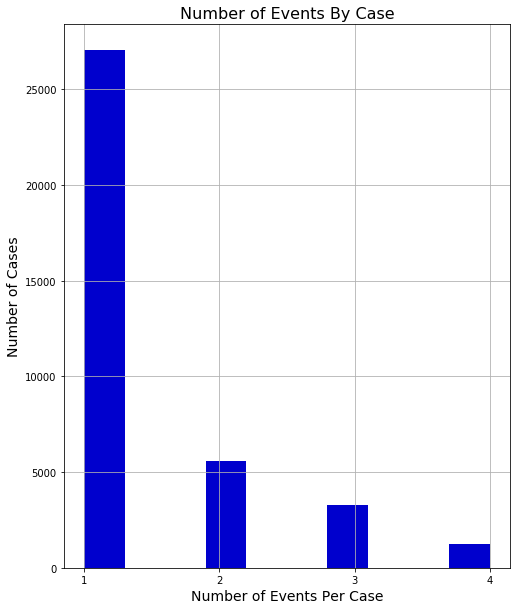

In [75]:
# case_event.groupby(['case_id'])['event_id'].count()
x = case_event['event_number'].hist(figsize=(8, 10), color='mediumblue' )
x.set_xlabel("Number of Events Per Case", fontdict={'fontsize': 14})
x.set_ylabel("Number of Cases", fontdict={'fontsize': 14})
x.set_title("Number of Events By Case", fontdict={'fontsize': 16});

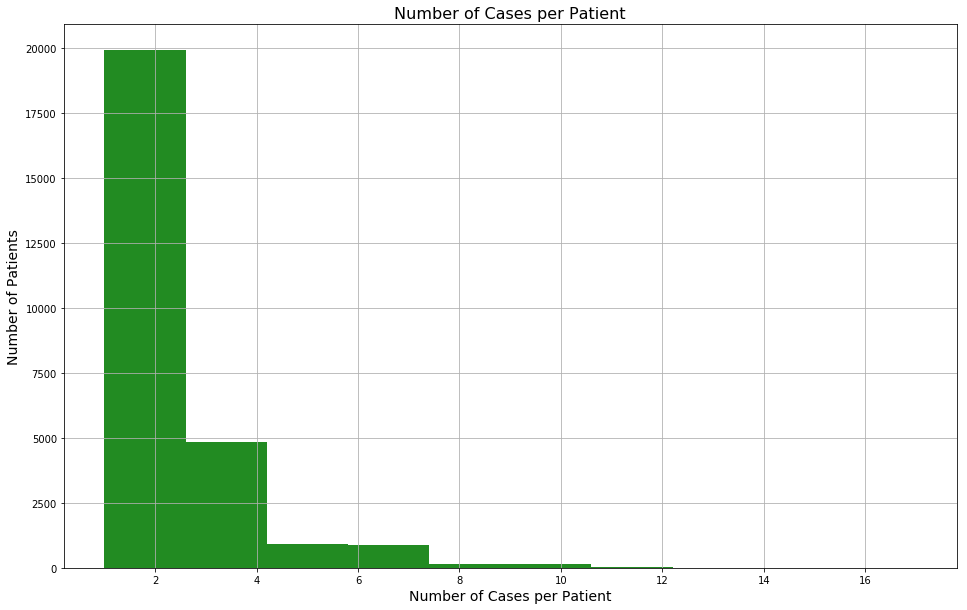

In [89]:
a = assessment.groupby(['patient_id'])['case_id'].count().hist(figsize=(16, 10), color='forestgreen' )
a.set_xlabel("Number of Cases per Patient", fontdict={'fontsize': 14})
a.set_ylabel("Number of Patients", fontdict={'fontsize': 14})
a.set_title("Number of Cases per Patient", fontdict={'fontsize': 16});

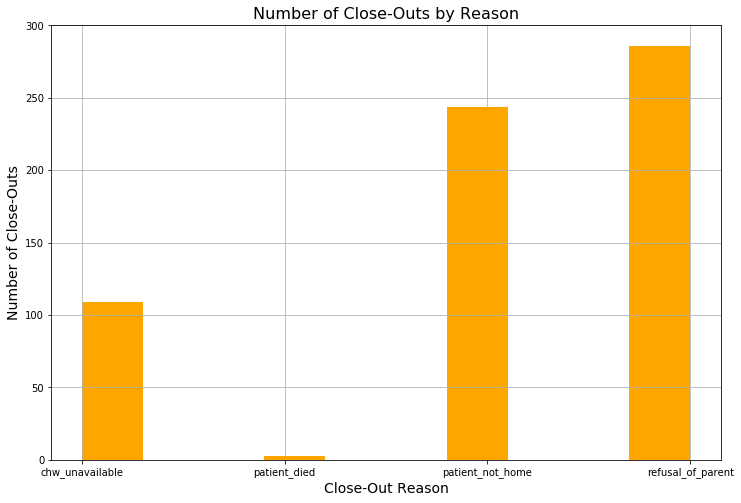

In [98]:
closed_out = treatment_fu[treatment_fu['close_out'] == True]
c = closed_out['why_close_out'].hist(figsize=(12, 8), color='orange' )
c.set_xlabel("Close-Out Reason", fontdict={'fontsize': 14})
c.set_ylabel("Number of Close-Outs", fontdict={'fontsize': 14})
c.set_title("Number of Close-Outs by Reason", fontdict={'fontsize': 16});